In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

C:\Users\LocNguyen\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\LocNguyen\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\LocNguyen\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\LocNguyen\anaconda3\envs\PythonData\l

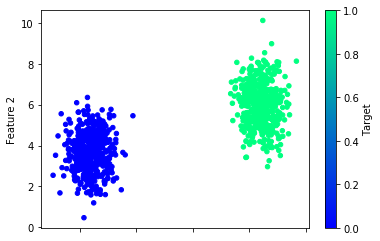

In [2]:
# Generate dummy dataset
# Data is linearly separable: output is either 0 or 1
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

#  Build a basic neural network model

In [3]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [4]:
# Normalize or standardize our numerical variables
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [5]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [6]:
# Add our first Dense layer (or hidden layer), including the input layer
# The input and first hidden layer are always built in the same instance
    # unit = # of neurons
    # input_dim: # of inputs, here we have 2 features
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [7]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [8]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


### Train and fit the above model to the data

In [10]:
# Fit the model to the training data (you pick the epoch yourself)
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
750/750 [==============================] - 0s 153us/sample - loss: 0.7055 - acc: 0.1853
Epoch 2/100
750/750 [==============================] - 0s 27us/sample - loss: 0.7016 - acc: 0.1747
Epoch 3/100
750/750 [==============================] - 0s 28us/sample - loss: 0.6990 - acc: 0.2280
Epoch 4/100
750/750 [==============================] - 0s 28us/sample - loss: 0.6969 - acc: 0.2773
Epoch 5/100
750/750 [==============================] - 0s 28us/sample - loss: 0.6956 - acc: 0.3400
Epoch 6/100
750/750 [==============================] - 0s 32us/sample - loss: 0.6947 - acc: 0.3933
Epoch 7/100
750/750 [==============================] - 0s 25us/sample - loss: 0.6940 - acc: 0.4467
Epoch 8/100
750/750 [==============================] - 0s 29us/sample - loss: 0.6936 - acc: 0.4773
Epoch 9/100
750/750 [==============================] - 0s 28us/sample - loss: 0.6934 - acc: 0.5000
Epoch 10/100
750/750 [==============================] - 0s 29us/sample - loss: 0.6932 - acc: 0.5093
Epoch 11

750/750 [==============================] - 0s 28us/sample - loss: 0.1210 - acc: 1.0000
Epoch 83/100
750/750 [==============================] - 0s 28us/sample - loss: 0.1189 - acc: 1.0000
Epoch 84/100
750/750 [==============================] - 0s 28us/sample - loss: 0.1168 - acc: 1.0000
Epoch 85/100
750/750 [==============================] - 0s 25us/sample - loss: 0.1147 - acc: 1.0000
Epoch 86/100
750/750 [==============================] - 0s 24us/sample - loss: 0.1128 - acc: 1.0000
Epoch 87/100
750/750 [==============================] - 0s 24us/sample - loss: 0.1108 - acc: 1.0000
Epoch 88/100
750/750 [==============================] - ETA: 0s - loss: 0.1193 - acc: 1.000 - 0s 25us/sample - loss: 0.1089 - acc: 1.0000
Epoch 89/100
750/750 [==============================] - 0s 27us/sample - loss: 0.1071 - acc: 1.0000
Epoch 90/100
750/750 [==============================] - 0s 25us/sample - loss: 0.1053 - acc: 1.0000
Epoch 91/100
750/750 [==============================] - 0s 24us/sample - lo

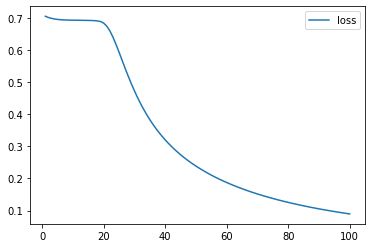

In [12]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

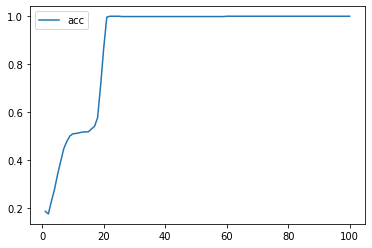

In [13]:
# Plot the accuracy
history_df.plot(y="acc")

In [14]:
# Evaluate the model using the test data, using evaluate()
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

250/250 - 0s - loss: 0.0837 - acc: 1.0000
Loss: 0.08373293781280518, Accuracy: 1.0


   ### Try the model with a completely different random dataset

In [15]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
nn_model.predict_classes(new_X_scaled)

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]])

## Summary: the order of creating a Keras Sequential model
1. define a model name: nn_model = tf.keras.models.Sequential()
2. add Dense layers: nn_model.add(tf.keras.layers.Dense(.....))
3. compile the model altogether: nn_model.compile()
4. train, fit, predict model like regular models

# Try using the same model (1 layer, 1 neuron) on a nonlinear moon-shaped data:

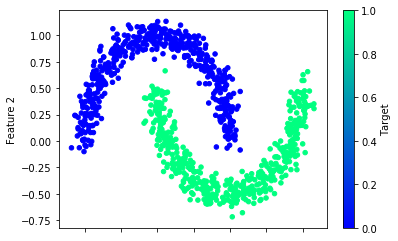

In [16]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector/array
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [17]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [18]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
750/750 [==============================] - 0s 33us/sample - loss: 0.9833 - acc: 0.4853
Epoch 2/100
750/750 [==============================] - 0s 27us/sample - loss: 0.8610 - acc: 0.5133
Epoch 3/100
750/750 [==============================] - 0s 29us/sample - loss: 0.7815 - acc: 0.5373
Epoch 4/100
750/750 [==============================] - 0s 27us/sample - loss: 0.7275 - acc: 0.5493
Epoch 5/100
750/750 [==============================] - 0s 31us/sample - loss: 0.6886 - acc: 0.5720
Epoch 6/100
750/750 [==============================] - 0s 28us/sample - loss: 0.6575 - acc: 0.5840
Epoch 7/100
750/750 [==============================] - 0s 29us/sample - loss: 0.6328 - acc: 0.6040
Epoch 8/100
750/750 [==============================] - 0s 32us/sample - loss: 0.6112 - acc: 0.6147
Epoch 9/100
750/750 [==============================] - 0s 28us/sample - loss: 0.5931 - acc: 0.6173
Epoch 10/100
750/750 [==============================] - 0s 29us/sample - loss: 0.5770 - acc: 0.6293
Epoch 11/

750/750 [==============================] - 0s 29us/sample - loss: 0.2788 - acc: 0.8800
Epoch 82/100
750/750 [==============================] - 0s 28us/sample - loss: 0.2780 - acc: 0.8827
Epoch 83/100
750/750 [==============================] - 0s 33us/sample - loss: 0.2772 - acc: 0.8827
Epoch 84/100
750/750 [==============================] - 0s 40us/sample - loss: 0.2763 - acc: 0.8840
Epoch 85/100
750/750 [==============================] - 0s 37us/sample - loss: 0.2756 - acc: 0.8840
Epoch 86/100
750/750 [==============================] - 0s 33us/sample - loss: 0.2749 - acc: 0.8840
Epoch 87/100
750/750 [==============================] - 0s 35us/sample - loss: 0.2742 - acc: 0.8853
Epoch 88/100
750/750 [==============================] - 0s 23us/sample - loss: 0.2736 - acc: 0.8867
Epoch 89/100
750/750 [==============================] - 0s 25us/sample - loss: 0.2729 - acc: 0.8893
Epoch 90/100
750/750 [==============================] - 0s 25us/sample - loss: 0.2722 - acc: 0.8893
Epoch 91/100


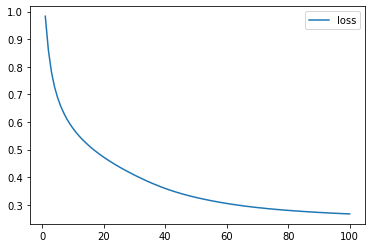

In [19]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

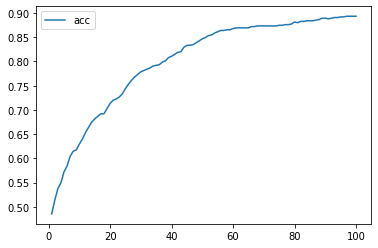

In [20]:
# Plot the loss
history_df.plot(y="acc")

# Create a new model with the rule of thumb: number of neurons = 2-3 times the number of inputs

In [21]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [22]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units = number_hidden_nodes, activation="relu", input_dim = number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [23]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
750/750 [==============================] - 0s 118us/sample - loss: 0.7113 - acc: 0.5307
Epoch 2/100
750/750 [==============================] - 0s 28us/sample - loss: 0.6756 - acc: 0.5307
Epoch 3/100
750/750 [==============================] - 0s 29us/sample - loss: 0.6447 - acc: 0.5307
Epoch 4/100
750/750 [==============================] - 0s 25us/sample - loss: 0.6178 - acc: 0.5307
Epoch 5/100
750/750 [==============================] - 0s 31us/sample - loss: 0.5938 - acc: 0.5307
Epoch 6/100
750/750 [==============================] - 0s 28us/sample - loss: 0.5727 - acc: 0.5253
Epoch 7/100
750/750 [==============================] - 0s 31us/sample - loss: 0.5534 - acc: 0.5507
Epoch 8/100
750/750 [==============================] - 0s 31us/sample - loss: 0.5355 - acc: 0.6347
Epoch 9/100
750/750 [==============================] - 0s 32us/sample - loss: 0.5184 - acc: 0.7840
Epoch 10/100
750/750 [==============================] - 0s 27us/sample - loss: 0.5013 - acc: 0.8040
Epoch 11

750/750 [==============================] - 0s 29us/sample - loss: 0.2320 - acc: 0.9013
Epoch 82/100
750/750 [==============================] - 0s 32us/sample - loss: 0.2313 - acc: 0.9027
Epoch 83/100
750/750 [==============================] - 0s 27us/sample - loss: 0.2307 - acc: 0.9027
Epoch 84/100
750/750 [==============================] - 0s 29us/sample - loss: 0.2299 - acc: 0.9027
Epoch 85/100
750/750 [==============================] - 0s 28us/sample - loss: 0.2291 - acc: 0.9027
Epoch 86/100
750/750 [==============================] - 0s 29us/sample - loss: 0.2284 - acc: 0.9027
Epoch 87/100
750/750 [==============================] - 0s 28us/sample - loss: 0.2278 - acc: 0.9027
Epoch 88/100
750/750 [==============================] - 0s 25us/sample - loss: 0.2270 - acc: 0.9027
Epoch 89/100
750/750 [==============================] - 0s 27us/sample - loss: 0.2264 - acc: 0.9027
Epoch 90/100
750/750 [==============================] - 0s 29us/sample - loss: 0.2255 - acc: 0.9027
Epoch 91/100
